<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/SQC_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brandon Thimmesch

IMSE 541 - Lab 3

23 September 2022

In [31]:
# importing libraries
import math
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import t
from scipy.stats import norm

import statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ex 4.35
An article in Solid State Technology (May 1987)
describes an experiment to determine the effect of
flow rate on etch uniformity on a silicon wafer
used in integrated-circuit manufacturing. Three flow
rates are tested, and the resulting uniformity (in percent) is observed for six test units at each flow rate.
The data are shown in Table 4E.4.
(a) Does flow rate affect etch uniformity?
Answer this question by using an analysis of
variance with alpha = 0.05
(b) Construct a box plot of the etch uniformity data.
Use this plot, together with the analysis of variance results, to determine which gas flow rate
would be best in terms of etch uniformity (a
small percentage is best).
(c) Plot the residuals versus predicted flow.
Interpret this plot.
(d) Does the normality assumption seem reasonable in this problem?

In [3]:
# Ex 4.35 - reading in data
data435 = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Lab3_Data_4.35.csv', sep=',', na_values=".")
data435.head()

,Observation,Flow,Uniform
0,1,125,2.7
1,2,125,2.6
2,3,125,4.6
3,4,125,3.2
4,5,125,3.0


In [10]:
# creating dataframe for flow rate = 125 SCCM
SCCM125 = data435['Uniform'][data435['Flow'] == 125]

# calculating mean etch uniformity (%) for flow rate = 125 SCCM
mean125 = statistics.mean(SCCM125)

In [11]:
# creating dataframe for flow rate = 160 SCCM
SCCM160 = data435['Uniform'][data435['Flow'] == 160]

# calculating mean etch uniformity (%) for flow rate = 160 SCCM
mean160 = statistics.mean(SCCM160)

In [12]:
# creating dataframe for flow rate = 200 SCCM
SCCM200 = data435['Uniform'][data435['Flow'] == 200]

# calculating mean etch uniformity (%) for flow rate = 200 SCCM
mean200 = statistics.mean(SCCM200)

In [58]:
# storing means in a list
mean435 = (mean125, mean160, mean200)

In [4]:
# Ex 4.35 (a)
# one way anova
stats.f_oneway(data435['Uniform'][data435['Flow'] == 125],
               data435['Uniform'][data435['Flow'] == 160],
               data435['Uniform'][data435['Flow'] == 200])

F_onewayResult(statistic=3.5856269113149857, pvalue=0.05336512592803552)

In [15]:
# Ex 4.35 (a)
# creating regression model for Ex 4.35
model_435a = ols('Uniform ~ C(Flow)', data = data435).fit()

# anova table for Ex 4.35
aov_table = sm.stats.anova_lm(model_435a,typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(Flow),3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [8]:
# function for adding mean squared error to anova table
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Flow),3.647778,2.0,1.823889,3.585627,0.053365
Residual,7.630000,15.0,0.508667,NaN,NaN


In [9]:
# Ex 4.35 (a)
# printing regression model for Ex 4.35
print(model_435a.summary())

                            OLS Regression Results                            
Dep. Variable:                Uniform   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.586
Date:                Fri, 23 Sep 2022   Prob (F-statistic):             0.0534
Time:                        02:50:35   Log-Likelihood:                -17.816
No. Observations:                  18   AIC:                             41.63
Df Residuals:                      15   BIC:                             44.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3167      0.291     11.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


Ex 4.35 (a) - Since the P-value shown above in the summary is equal to 0.0534, which is greater than alpha, 0.05, we can reject the hypothesis that flow rate affects uniformity. 



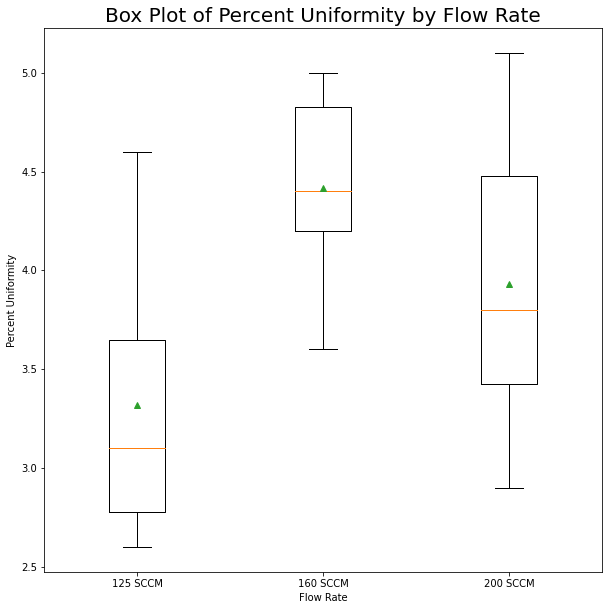

In [6]:
# Ex 4.35(b)
# box plots by factor levels (125, 160, and 200 SCCM) for Ex 4.35
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Percent Uniformity by Flow Rate", fontsize= 20)
ax.set

data435b = [data435['Uniform'][data435['Flow'] == 125],
               data435['Uniform'][data435['Flow'] == 160],
               data435['Uniform'][data435['Flow'] == 200]]

ax.boxplot(data435b,
           labels= ['125 SCCM', '160 SCCM', '200 SCCM'],
           showmeans= True)

plt.xlabel("Flow Rate")
plt.ylabel("Percent Uniformity")

plt.show()

Ex 4.35(b) - Since smaller mean etch uniformity (%) is attractive, 125 SCCM is the optimal gas flow rate when compared to 160 and 200 SCCM.

In [20]:
# Ex 4.35(c)
# prediction for all observations in Ex 4.35
predict435c = model_435a.predict()
predict435c

array([3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
       3.31666667, 4.41666667, 4.41666667, 4.41666667, 4.41666667,
       4.41666667, 4.41666667, 3.93333333, 3.93333333, 3.93333333,
       3.93333333, 3.93333333, 3.93333333])

In [23]:
# Ex 4.35(c)
# Ex 4.35 model observation residuals
residuals435c = model_435a.resid
residuals435c

0    -0.616667
1    -0.716667
2     1.283333
3    -0.116667
4    -0.316667
5     0.483333
6     0.183333
7     0.483333
8     0.583333
9    -0.216667
10   -0.816667
11   -0.216667
12    0.666667
13   -1.033333
14   -0.533333
15   -0.433333
16    0.166667
17    1.166667
dtype: float64

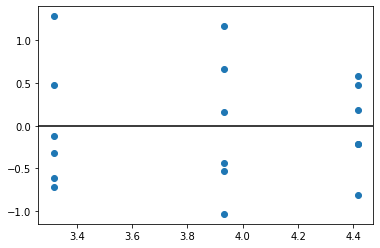

In [27]:
# Ex 4.35(c)
# plot of residuals versus predicted flow
plt.scatter(predict435c,residuals435c)
plt.axhline(y=0, color='k', linestyle='-')
plt.show()

Ex 4.35(c) - The residual versus predicted flow plot shows that 125, 160, and 200 SCCM have similar variances.

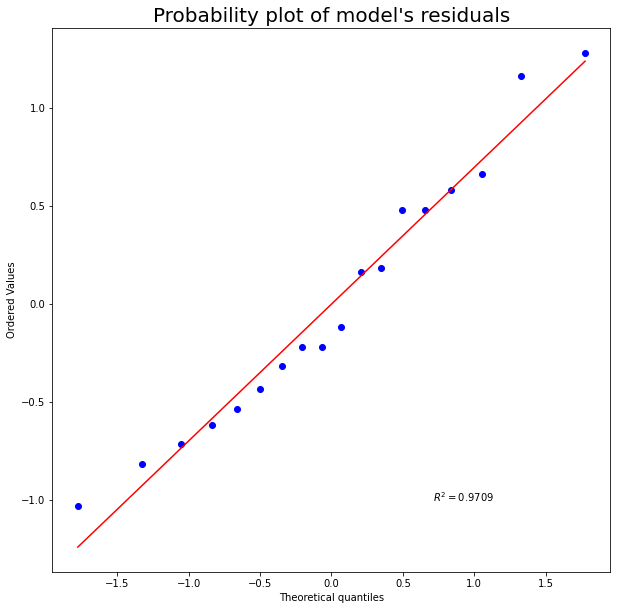

In [28]:
# Ex 4.35(d)
# Normality assumption check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals435c, plot= plt, rvalue= True)
ax.set_title("Probability plot of model's residuals", fontsize= 20)
ax.set

plt.show()

Ex 4.35(d): Since the model's residuals lie along the red line, we are safe to assume that the model's residuals and observed etch uniformity follow a normal distribution.

# Ex 4.36
Compare the mean etch uniformity values at each of
the flow rates from Exercise 4.33 with a scaled
t distribution. Does this analysis indicate that there
are differences in mean etch uniformity at the different flow rates? Which flows produce different
results?

In [84]:
# Ex 4.36
# calculating scale
Residual_MSE = 0.508667
n = 6
scale = math.sqrt(Residual_MSE/n)
print("The scale factor for our model is equal to", scale)

The scale factor for our model is equal to 0.291166332760732


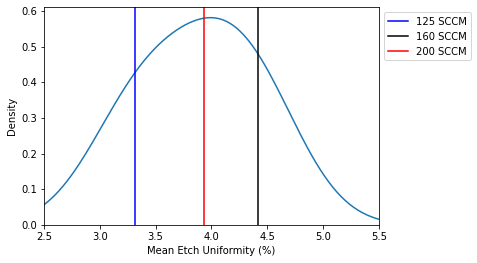

In [77]:
# Ex 4.36
# plotting distribution of observations
plot436 = sns.kdeplot(data = data435['Uniform'], x = (mean125, mean160, mean200))

# labeling x axis
plt.xlabel('Mean Etch Uniformity (%)')

# plotting vertical lines to signify mean etch uniformity for 125, 160, and 200 SCCM
plt.axvline(x = mean125, color = 'b', label = '125 SCCM')
plt.axvline(x = mean160, color = 'k', label = '160 SCCM')
plt.axvline(x = mean200, color = 'r', label = '200 SCCM')

# limiting x-axis
plt.xlim([2.5, 5.5])

# creating legend
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

In [86]:
# printing means for 125, 160, and 200 SCCM
print(mean435)

(3.3166666666666664, 4.416666666666667, 3.933333333333333)


Ex 4.36 - With mean etch uniformity for flow rate being: 3.32% for 125 SCCM, 4.42% for 160 SCCM, and 3.93% for 200 SCCM, it is apparent that all three flow rates produce similar results. However, since we want to minimize % mean etch uniformity, a flow rate equal to 125 SCCM produces the highest quality results. In turn, a flow rate of 160 SCCM produces unappealing results.

If we shifted the distribution left (since lower % mean etch uniformity is prefferred) and centered the distribution on the mean etch uniformity produced by a flow rate of 125 SCCM, the product of a 160 SCCM flow rate would fall close to the edge of the upper tail and 200 SCCM would lie within a few standards deviations.

# Ex 4.53
Find the missing values from the Minitab output


In [92]:
# Ex 4.53
# data provided
x_bar = 31.4
mew_naught = 30
SE_mean = 0.336

# calculating z score
Z = (x_bar - mew_naught)/SE_mean

# calculating p-value
P = 2 * stats.norm.sf(abs(Z))

print("The missing Z score is", Z, "and the missing p-value is", P)

The missing Z score is 4.1666666666666625 and the missing p-value is 3.09085937645925e-05


# Ex 4.47
The brake horsepower developed by an automobile
engine on a dynamometer is thought to be a function
of the engine speed in revolutions per minute (rpm),
the road octane number of the fuel, and the engine
compression. An experiment is run in the laboratory
and the data are drawn in Table 4E.10:
(a) Fit a multiple regression model to these data.
(b) Test for significance of regression. What conclusions can you draw?
(c) Based on t-tests, do you need all three regressor
variables in the model?

In [87]:
# Ex 4.47 - reading in data
data447 = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Lab3_Data_4.47.csv', sep=',', na_values=".")
data447.head()

,Brake Horsepower,RPM,Road Octane Number,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100


In [89]:
# Ex 4.47 (a)
# fitting multiple factor regression model for Ex 4.47
x447 = data447[['RPM','Road Octane Number','Compression']]
y447 = data447['Brake Horsepower']

x447CONST = sm.add_constant(x447)
 
model_447a = sm.OLS(y447, x447CONST).fit()
predictions = model_447a.predict(x447CONST) 
 
print_model_447a = model_447a.summary()
print(print_model_447a)

                            OLS Regression Results                            
Dep. Variable:       Brake Horsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Fri, 23 Sep 2022   Prob (F-statistic):            0.00317
Time:                        04:03:52   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -266.0312     92

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


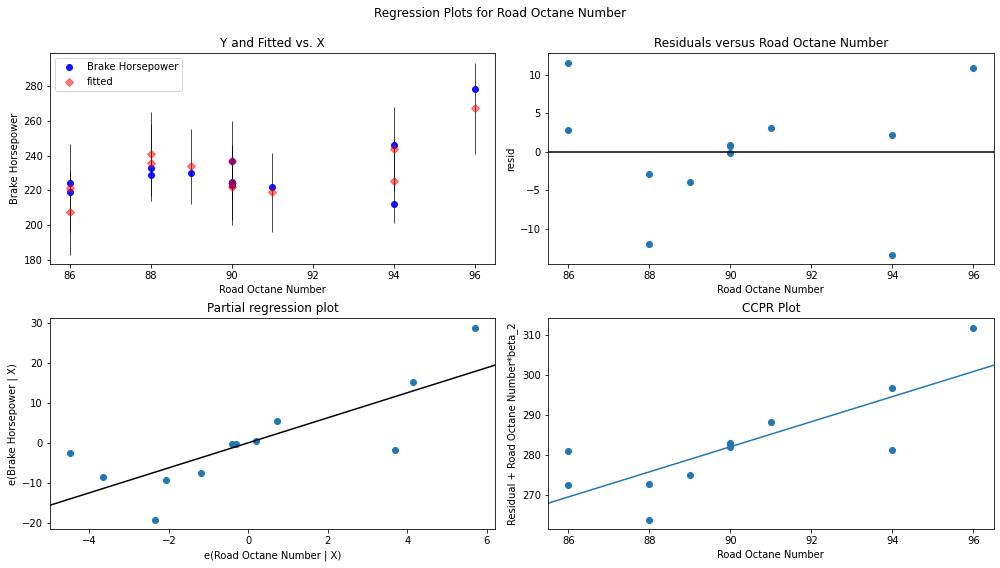

In [ ]:
# Ex 4.47 (b)
# Residual analysis on Road Octane Number

# H0: B1 = B2 = B3 = 0
# HA: Bj does not equal 0 for at least one j

fig_447a = plt.figure(figsize=(14, 8))
fig_447a = sm.graphics.plot_regress_exog(model_447a,'Road Octane Number',fig=fig_447a)

Ex 4.47 (b) - P values (found in column P>|t|) for RPM, Road Octane Number, and Compression are all less than 0.05 which means that these variables are statistically significant. 

Since Road Octane Number has the greatest coefficient, equal to 3.1348, Road Octane Number has the greatest weight in a function of brake horsepower. 

In order to reject the null hypothesis (H0: B1 = B2 = B3 = 0), the linear regression model result must yield a relatively high F-statistic. Since the F-statistic is equal to 11.12, which is relatively high, we have more evidence for rejecting the null hypothesis since high F-statistic values correlate to a low p-value. There is enough evidence to support the alternative hypothesis (HA: Bj does not equal 0 for at least one j), which is self-evident since the model output coefficients for RPM, Road Octane Number, and Compression are all nonzero.

Ex 4.47 (c) - The P-value for RPM is equal to 0.044. The P-value for Road Octane Number is equal to 0.006. The P-value for RPM is equal to 0.008. Since all three regressor variables P-values are less than 0.05, all three regressor variables are statistically significant and necessary to include in the model.